In [13]:
#import Dependancies
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import geopandas as gpd
import numpy as np

In [14]:
#Read the data from the CSV file
#The CSV file is located in the same folder where the jupyter notebook is located 
wa_cvd_death_df=pd.read_csv("cleaned_data.csv")
wa_cvd_death_df

,Year,State,County,Class,Topic,Death_Rate(per M),Data_Value_Type,Gender,Ethnicity,Latitude,Longitude
0,2020,AK,Kenai Peninsula,Cardiovascular Diseases,Heart Disease Mortality,165.1,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Male,Hispanic,60.193263,-150.280744
1,2020,AL,Walker County,Cardiovascular Diseases,Heart Disease Mortality,109.0,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Hispanic,33.810226,-87.297070
2,2020,AL,St. Clair County,Cardiovascular Diseases,Heart Disease Mortality,90.0,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Asian,33.716065,-86.314960
3,2020,FL,Polk County,Cardiovascular Diseases,Heart Disease Mortality,180.2,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Female,Hispanic,27.946050,-81.699391
4,2020,GA,Forsyth County,Cardiovascular Diseases,Heart Disease Mortality,133.5,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Asian,34.228391,-84.124685
...,...,...,...,...,...,...,...,...,...,...,...
33426,2020,WA,Island County,Cardiovascular Diseases,Heart Disease Mortality,221.2,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Female,More than one race,48.046678,-122.562089
33427,2020,VA,Carroll County,Cardiovascular Diseases,Heart Disease Mortality,312.9,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,White,36.733046,-80.729746
33428,2020,VA,Petersburg City,Cardiovascular Diseases,Heart Disease Mortality,584.1,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,37.204297,-77.398058
33429,2020,VA,Lunenburg County,Cardiovascular Diseases,Heart Disease Mortality,455.6,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Black,36.951916,-78.245745


In [19]:
#filter only the overall fugures of each counties 
wa_cvd_death_overall=pd.DataFrame(wa_cvd_death_df.loc[(wa_cvd_death_df["Gender"]=="Overall") & (wa_cvd_death_df["Ethnicity"]=="Overall")])
wa_cvd_death_overall.head()

,Year,State,County,Class,Topic,Death_Rate(per M),Data_Value_Type,Gender,Ethnicity,Latitude,Longitude
40,2020,IA,Harrison County,Cardiovascular Diseases,Heart Disease Mortality,308.4,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,41.684772,-95.820331
52,2020,CO,Washington County,Cardiovascular Diseases,Heart Disease Mortality,256.1,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,39.964728,-103.198202
77,2020,IA,Bremer County,Cardiovascular Diseases,Heart Disease Mortality,333.5,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,42.776652,-92.322642
105,2020,GA,Jackson County,Cardiovascular Diseases,Heart Disease Mortality,427.2,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,34.139601,-83.564697
106,2020,AL,Lee County,Cardiovascular Diseases,Heart Disease Mortality,310.7,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,32.606458,-85.356228


In [21]:
#Merge the CVD detah rates data with smoking rates
smoing_df=pd.read_csv("SmokingRates.csv")
#smoing_df
wa_cvd_death_overall_mrg=pd.merge(wa_cvd_death_overall,smoing_df,how="left", on=["State", "State"])
#sort data in descending order 
wa_cvd_death_overall_mrg = wa_cvd_death_overall_mrg.sort_values(by='Death_Rate(per M)', ascending=False)

top_5=pd.DataFrame(wa_cvd_death_overall_mrg.head(5))
bottom_5=pd.DataFrame(wa_cvd_death_overall_mrg.tail(5))

#append top and bottom rcords 
top_bottom_5 = pd.concat([top_5,bottom_5])
top_bottom_5

,Year,State,County,Class,Topic,Death_Rate(per M),Data_Value_Type,Gender,Ethnicity,Latitude,Longitude,State_Desc,Smoking Rate
928,2020,LA,Franklin Parish,Cardiovascular Diseases,Heart Disease Mortality,859.0,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,32.140156,-91.669639,Louisiana,23.10%
1375,2020,KY,Perry County,Cardiovascular Diseases,Heart Disease Mortality,835.6,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,37.250079,-83.226845,Kentucky,24.60%
249,2020,AL,Walker County,Cardiovascular Diseases,Heart Disease Mortality,834.0,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,33.810226,-87.297070,Alabama,20.90%
1367,2020,LA,Caldwell Parish,Cardiovascular Diseases,Heart Disease Mortality,832.4,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,32.097542,-92.110670,Louisiana,23.10%
1550,2020,MO,Pemiscot County,Cardiovascular Diseases,Heart Disease Mortality,770.6,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,36.212067,-89.787787,Missouri,20.80%
216,2020,CO,Eagle County,Cardiovascular Diseases,Heart Disease Mortality,99.8,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,39.620840,-106.689275,Colorado,14.60%
2689,2020,SD,Oglala Lakota County,Cardiovascular Diseases,Heart Disease Mortality,78.6,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,43.331920,-102.555763,South Dakota,19.30%
462,2020,CO,Summit County,Cardiovascular Diseases,Heart Disease Mortality,69.9,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,39.628867,-106.110871,Colorado,14.60%
88,2020,AK,Kusilvak,Cardiovascular Diseases,Heart Disease Mortality,46.2,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,62.159507,-163.348983,Alaska,21.00%
418,2020,AS,American Samoa County,Cardiovascular Diseases,Heart Disease Mortality,10.4,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,-14.301754,-170.719474,Alaska,17.00%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


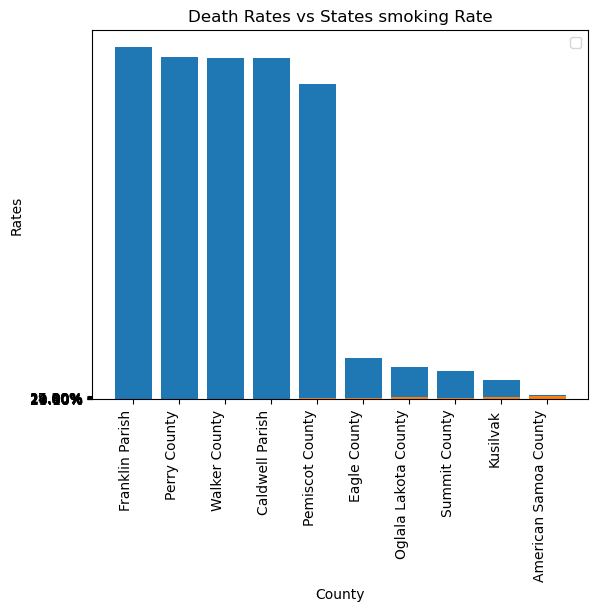

In [22]:


#plot the top and bottom higher rates in the country

top_bottom_5 = top_bottom_5.sort_values(by='Death_Rate(per M)', ascending=False)

x_axis=top_bottom_5["County"].unique()

y_axis_death=top_bottom_5["Death_Rate(per M)"]
y_axis_smoke=top_bottom_5["Smoking Rate"]

#####
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Plotting
fig, ax = plt.subplots()
#plt.bar(x_axis, users, color='r', alpha=0.5, align="center")
bar1 = ax.bar(x_axis, y_axis_death)
bar2 = ax.bar(x_axis, y_axis_smoke)

# Adding labels and title
ax.set_xlabel('County')
ax.set_ylabel('Rates')
ax.set_title('Death Rates vs States smoking Rate')
ax.legend()


#######

#plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
plt.xticks(rotation=90, ha='right')
plt.show()

In [8]:
#Display all the counties witht the death rates in a map visual
#limit the map visual only to the USA
# Get the bounding box coordinates for the selected country (United States bounding box coordinates)
us_bbox = [-125, 24, -66, 50]  # [min_longitude, min_latitude, max_longitude, max_latitude]

top_bottom_5_conties = top_bottom_5.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "CartoLight",
    frame_width = 750,
    frame_height = 500,
    size = "Death_Rate(per M)", 
    xlim=(us_bbox[0], us_bbox[2]),
    ylim=(us_bbox[1], us_bbox[3]), 
    color = "County",
    hover_cols=["City","Death_Rate(per M)"]
)
# Display the map
top_bottom_5_conties

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (County,Death_Rate(per M))

In [7]:
# Load the GeoPandas DataFrame with the US states geometry
usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa_states.head()
#Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

# Merge the CVD death rates data with the GeoPandas DataFrame
#merged_data = usa_states.merge(wa_cvd_death_overall, on='state_column')

# Plot the map with hvPlot
#merged_data.hvplot(c='CVD_death_rate_column', 
                   #geo=True, 
                   #hover_cols=['state_column', 'CVD_death_rate_column'],
                  # cmap='viridis')

C:\Users\rohan\AppData\Local\Temp\ipykernel_28404\2175694427.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [4]:
wa_cvd_death_overall_avg =wa_cvd_death_overall.groupby("State")["Death_Rate(per M)"].mean()
wa_cvd_death_overall_avg

State
AK    280.192308
AL    488.714925
AR    464.186667
AS     10.400000
AZ    302.193333
CA    290.860345
CO    255.756250
CT    279.087500
DC    355.800000
DE    316.266667
FL    312.986567
GA    413.442138
GU    571.200000
HI    243.760000
IA    352.414141
ID    308.384091
IL    358.661765
IN    367.296739
KS    341.729524
KY    441.730000
LA    479.304688
MA    255.814286
MD    356.854167
ME    305.918750
MI    382.748193
MN    262.511494
MO    406.493043
MP    290.500000
MS    489.210976
MT    326.912500
NC    343.154000
ND    308.062264
NE    308.435484
NH    290.800000
NJ    324.457143
NM    315.406061
NV    389.129412
NY    330.517742
OH    396.476136
OK    494.041558
OR    284.283333
PA    350.207463
PR    202.578205
RI    290.060000
SC    381.632609
SD    315.927273
TN    456.377895
TX    384.708661
UT    307.810345
VA    353.115789
VT    331.021429
WA    286.535897
WI    317.579167
WV    399.118182
WY    302.695652
Name: Death_Rate(per M), dtype: float64